# Employee Salary prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
DF= pd.read_csv("1000 Records.csv")

In [3]:
DF.sample()

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
524,968785,Mr.,Noe,K,Clay,M,noe.clay@bellsouth.net,Vince Clay,Lilly Clay,Levy,...,297-15-5482,217-458-3909,Solon Mills,McHenry,Solon Mills,IL,60080,Midwest,nkclay,zqJt<W%f_7D7p


# EDA
    1. Cleaning the Data

#### Cleaning data remove the column that is not required for the prediction

In [4]:
DF.columns

Index(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name',
       'Gender', 'E Mail', 'Father's Name', 'Mother's Name',
       'Mother's Maiden Name', 'Date of Birth', 'Time of Birth', 'Age in Yrs.',
       'Weight in Kgs.', 'Date of Joining', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'Age in Company (Years)', 'Salary',
       'Last % Hike', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'User Name', 'Password'],
      dtype='object')

In [5]:
df=DF.loc[:,['Gender', 'Age in Yrs.',
       'Weight in Kgs.', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining','Day of Joining',
       'DOW of Joining', 'Age in Company (Years)',
       'Last % Hike','Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'Salary']]

In [6]:
df

,Gender,Age in Yrs.,Weight in Kgs.,Quarter of Joining,Half of Joining,Year of Joining,Month of Joining,Day of Joining,DOW of Joining,Age in Company (Years),Last % Hike,Place Name,County,City,State,Zip,Region,Salary
0,F,45.66,44,Q4,H2,2010,12,18,Saturday,6.61,17%,Las Vegas,Clark,Las Vegas,NV,89128,West,119090
1,M,23.76,52,Q2,H1,2017,4,25,Tuesday,0.26,14%,Irons,Lake,Irons,MI,49644,Midwest,117991
2,F,22.68,42,Q1,H1,2017,3,27,Monday,0.34,28%,Lexington,Fayette,Lexington,KY,40501,South,161045
3,F,41.70,43,Q1,H1,2003,2,25,Tuesday,14.43,16%,Munster,Lake,Munster,IN,46321,Midwest,142616
4,F,22.39,58,Q4,H2,2016,10,11,Tuesday,0.79,11%,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,135706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,F,32.01,59,Q1,H1,2008,1,7,Monday,9.56,10%,Mukwonago,Waukesha,Mukwonago,WI,53149,Midwest,72930
996,M,30.48,84,Q1,H1,2010,3,5,Friday,7.40,16%,Freeport,Barry,Freeport,MI,49325,Midwest,121949
997,F,59.88,50,Q1,H1,2001,2,20,Tuesday,16.44,14%,Turlock,Stanislaus,Turlock,CA,95381,West,82734
998,F,30.21,48,Q1,H1,2012,3,15,Thursday,5.37,9%,Stamford,Fairfield,Stamford,CT,6910,Northeast,66854


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  1000 non-null   object 
 1   Age in Yrs.             1000 non-null   float64
 2   Weight in Kgs.          1000 non-null   int64  
 3   Quarter of Joining      1000 non-null   object 
 4   Half of Joining         1000 non-null   object 
 5   Year of Joining         1000 non-null   int64  
 6   Month of Joining        1000 non-null   int64  
 7   Day of Joining          1000 non-null   int64  
 8   DOW of Joining          1000 non-null   object 
 9   Age in Company (Years)  1000 non-null   float64
 10  Last % Hike             1000 non-null   object 
 11  Place Name              1000 non-null   object 
 12  County                  1000 non-null   object 
 13  City                    1000 non-null   object 
 14  State                   1000 non-null   o

# Encoding the Data with Label Encoder converting all the catagorical data into numeric values.

In [8]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
catagorical_data = ['Gender', 'Age in Yrs.',
       'Weight in Kgs.', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining','Day of Joining',
       'DOW of Joining', 'Age in Company (Years)',
       'Last % Hike','Place Name', 'County', 'City',
       'State', 'Zip', 'Region']

for i in catagorical_data:
    df[i]=df[i].astype('str')
    df[i]=LE.fit_transform(df[i])

In [9]:
df

,Gender,Age in Yrs.,Weight in Kgs.,Quarter of Joining,Half of Joining,Year of Joining,Month of Joining,Day of Joining,DOW of Joining,Age in Company (Years),Last % Hike,Place Name,County,City,State,Zip,Region,Salary
0,0,578,4,3,1,30,3,9,2,697,9,410,106,410,32,893,3,119090
1,1,58,12,1,0,37,6,17,5,17,6,362,276,362,21,491,0,117991
2,0,33,2,0,0,37,5,19,1,24,21,423,184,423,16,382,2,161045
3,0,475,3,0,0,23,4,17,5,240,8,521,276,521,14,449,0,142616
4,0,26,18,3,1,36,1,2,5,53,3,236,177,236,0,989,3,135706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,254,19,0,0,28,0,28,1,796,2,520,557,520,47,530,0,72930
996,1,214,44,0,0,30,5,26,0,722,8,267,30,267,21,488,0,121949
997,0,886,10,0,0,21,4,12,5,294,6,807,505,807,4,938,3,82734
998,0,209,8,0,0,32,5,6,4,654,30,756,179,756,6,716,1,66854


In [10]:
df.isna().sum()

Gender                    0
Age in Yrs.               0
Weight in Kgs.            0
Quarter of Joining        0
Half of Joining           0
Year of Joining           0
Month of Joining          0
Day of Joining            0
DOW of Joining            0
Age in Company (Years)    0
Last % Hike               0
Place Name                0
County                    0
City                      0
State                     0
Zip                       0
Region                    0
Salary                    0
dtype: int64

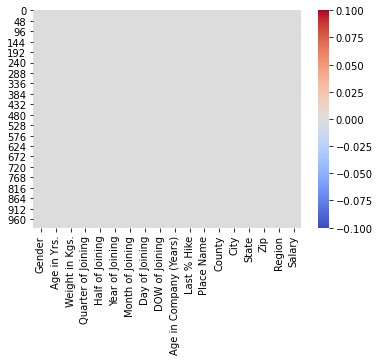

In [11]:
sns.heatmap(df.isna(), cmap = 'coolwarm')
plt.show()

In [12]:
df.describe()

,Gender,Age in Yrs.,Weight in Kgs.,Quarter of Joining,Half of Joining,Year of Joining,Month of Joining,Day of Joining,DOW of Joining,Age in Company (Years),Last % Hike,Place Name,County,City,State,Zip,Region,Salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.509000,445.660000,19.409000,1.489000,0.481000,26.992000,5.411000,14.515000,2.925000,394.527000,15.007000,437.719000,295.853000,437.719000,24.518000,496.202000,1.410000,120288.528000
std,0.500169,257.936802,13.900322,1.113157,0.499889,8.565588,3.380756,8.711008,2.008335,243.200481,8.754747,252.677922,161.539123,252.677922,14.228638,286.533811,1.066319,45178.339916
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40040.000000
25%,0.000000,224.750000,9.000000,1.000000,0.000000,22.000000,2.000000,7.000000,1.000000,172.000000,8.000000,215.750000,166.750000,215.750000,13.000000,248.750000,0.000000,82122.000000
50%,1.000000,445.500000,17.000000,1.000000,0.000000,29.000000,6.000000,15.000000,3.000000,393.500000,15.000000,436.500000,294.500000,436.500000,24.000000,496.500000,2.000000,119409.000000
75%,1.000000,671.250000,28.000000,3.000000,1.000000,34.000000,8.000000,21.000000,5.000000,613.250000,22.000000,657.250000,431.250000,657.250000,37.000000,743.250000,2.000000,159109.000000
max,1.000000,888.000000,50.000000,3.000000,1.000000,37.000000,11.000000,30.000000,6.000000,810.000000,30.000000,879.000000,581.000000,879.000000,49.000000,992.000000,3.000000,199943.000000


In [13]:
des=pd.DataFrame(df.describe())
des.iloc[[1,5,6,7]]

,Gender,Age in Yrs.,Weight in Kgs.,Quarter of Joining,Half of Joining,Year of Joining,Month of Joining,Day of Joining,DOW of Joining,Age in Company (Years),Last % Hike,Place Name,County,City,State,Zip,Region,Salary
mean,0.509,445.66,19.409,1.489,0.481,26.992,5.411,14.515,2.925,394.527,15.007,437.719,295.853,437.719,24.518,496.202,1.41,120288.528
50%,1.000,445.50,17.000,1.000,0.000,29.000,6.000,15.000,3.000,393.500,15.000,436.500,294.500,436.500,24.000,496.500,2.00,119409.000
75%,1.000,671.25,28.000,3.000,1.000,34.000,8.000,21.000,5.000,613.250,22.000,657.250,431.250,657.250,37.000,743.250,2.00,159109.000
max,1.000,888.00,50.000,3.000,1.000,37.000,11.000,30.000,6.000,810.000,30.000,879.000,581.000,879.000,49.000,992.000,3.00,199943.000


# key observation:
    1. The mean is lesser then the median (50th percentile) in most of the columns. 
    2. There is difference in 75th percentile and max.
    3. The first and second observation suggest that there might be outliers and skewness present in few columns.
    Lets see those details graphically.


#  Skewness identification:

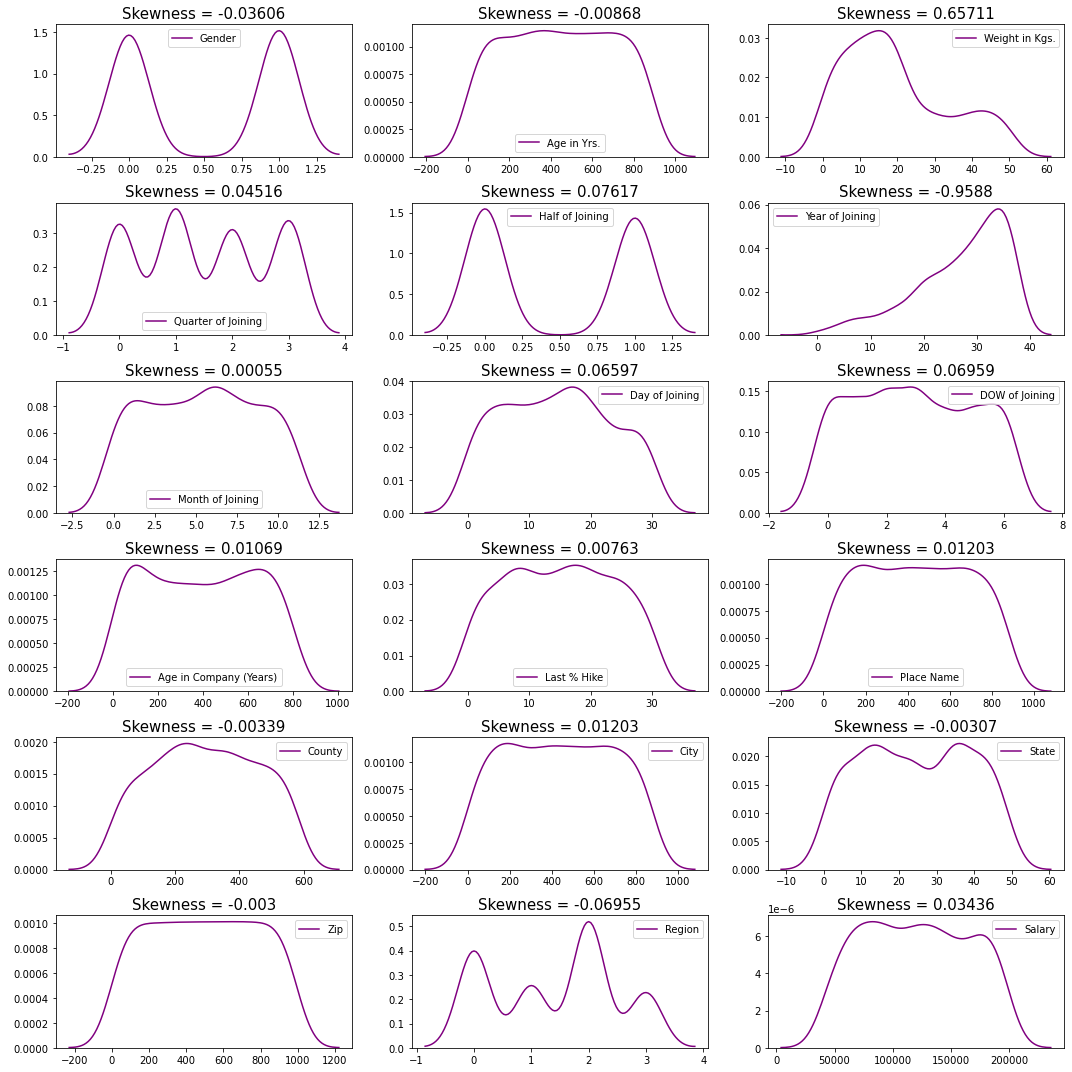

In [14]:
plt.figure(figsize=(15,15))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(6,3,i+1)         
    sns.kdeplot(df[collist[i]], color = "purple")
    plt.title(f"Skewness = {round(df[collist[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

In [15]:
skewness=[]
for i in df.skew().values:
    skewness.append(i)
    
df_skewness= pd.DataFrame({"Feature_names": collist,"Skew": skewness})
df_skewness= df_skewness.sort_values(by="Skew", ascending=False, ignore_index= True)


skew_postive_row= []
skew_negative_row=[]
for index, row in df_skewness.iterrows():
    if row['Skew']>0.49:
        skew_postive_row.append(row['Feature_names'])
    elif row['Skew']< -0.49:
        skew_negative_row.append(row['Feature_names'])
        
df_skewness
 

,Feature_names,Skew
0,Weight in Kgs.,0.657110
1,Half of Joining,0.076169
2,DOW of Joining,0.069591
3,Day of Joining,0.065971
4,Quarter of Joining,0.045158
5,Salary,0.034356
6,City,0.012028
7,Place Name,0.012028
8,Age in Company (Years),0.010691
9,Last % Hike,0.007634


In [16]:
print("\n\nFeature names with Skewness is present more than +/-0.5 as follows:\n","\n\nPostive Skewed data:\n", skew_postive_row,"\n\nnegative Skewed data:\n", skew_negative_row)       



Feature names with Skewness is present more than +/-0.5 as follows:
 

Postive Skewed data:
 ['Weight in Kgs.'] 

negative Skewed data:
 ['Year of Joining']


# Key observation: 
    1. Year of Joining logically will increase in the preiod of time since because of the growth of the job market
    2. Weight unexpectedly has postive skewmenss, which means people are getting healthier in the given period of time.
    3. But before taking the decision lets see the correlation of the variable with target Variable Salary


# Correlation of the DataSet:

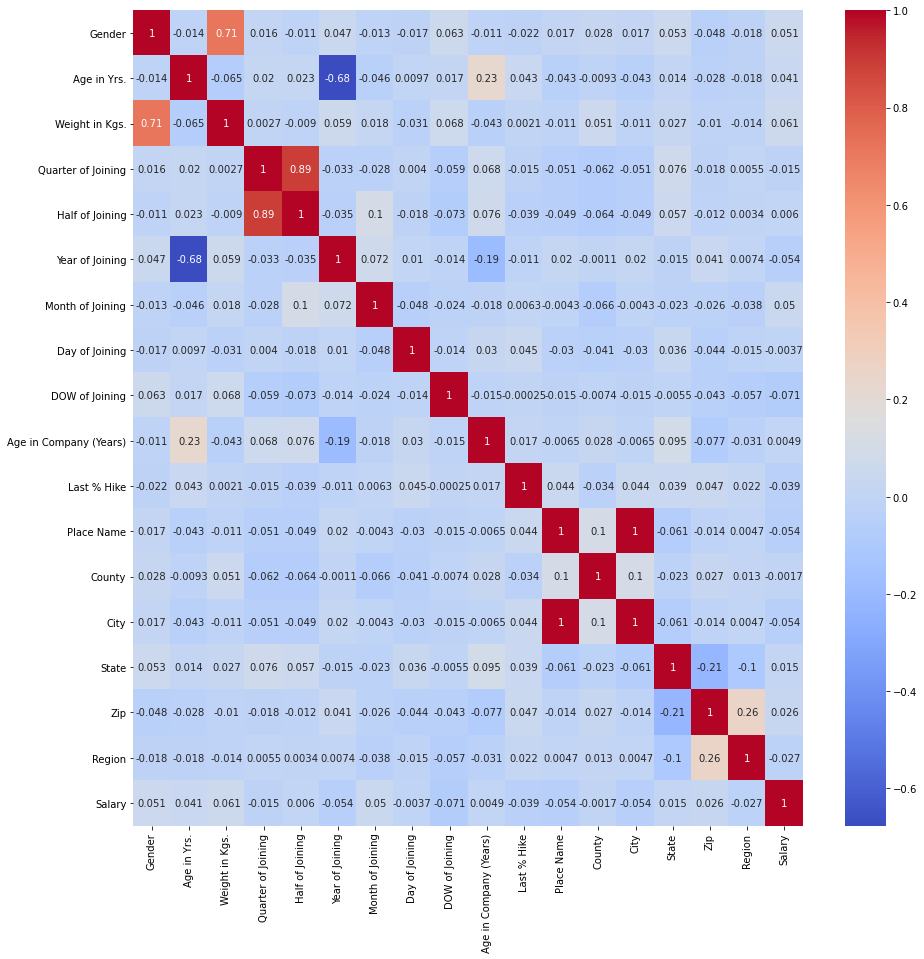

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm")
plt.show()

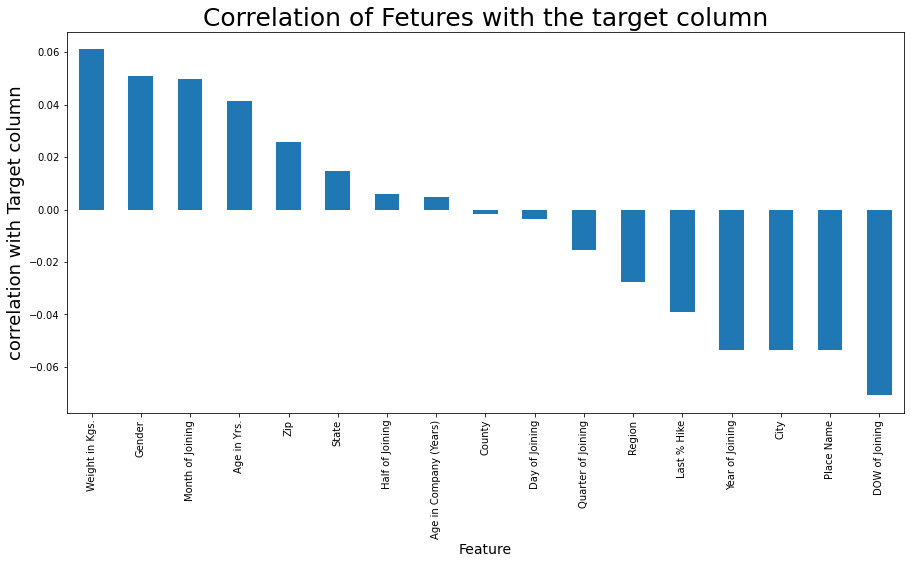

In [18]:
plt.figure(figsize=(15,7))
df.corr()["Salary"].sort_values(ascending=False).drop(["Salary"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

In [19]:
print("KEY OBSERVTIONS:\n\n",df.corr()["Salary"].sort_values(ascending=False).drop(["Salary"]))

KEY OBSERVTIONS:

 Weight in Kgs.            0.061088
Gender                    0.050883
Month of Joining          0.049630
Age in Yrs.               0.041402
Zip                       0.025962
State                     0.014573
Half of Joining           0.005996
Age in Company (Years)    0.004946
County                   -0.001674
Day of Joining           -0.003656
Quarter of Joining       -0.015299
Region                   -0.027460
Last % Hike              -0.039161
Year of Joining          -0.053501
City                     -0.053534
Place Name               -0.053534
DOW of Joining           -0.070859
Name: Salary, dtype: float64


### From the above "Year of joining" and "Weight in Kgs" has highest correlation so we cant drop the data but how ever correcting "Year of joining" wont make any sense in the data since job requirement will increase in period of time so we will try and removing the skewness in "Weight in Kgs"

    Year of Joining           0.064453
    Weight in Kgs.           -0.071414

# Removing skewness with SquareRootMethod.

In [20]:
df['Weight in Kgs.']= np.sqrt(df['Weight in Kgs.'])
df['Weight in Kgs.'].skew()


-0.17658653801310667

In [21]:
print("KEY OBSERVTIONS:\n\n",df.corr()["Salary"].sort_values(ascending=False).drop(["Salary"]))

KEY OBSERVTIONS:

 Weight in Kgs.            0.062820
Gender                    0.050883
Month of Joining          0.049630
Age in Yrs.               0.041402
Zip                       0.025962
State                     0.014573
Half of Joining           0.005996
Age in Company (Years)    0.004946
County                   -0.001674
Day of Joining           -0.003656
Quarter of Joining       -0.015299
Region                   -0.027460
Last % Hike              -0.039161
Year of Joining          -0.053501
City                     -0.053534
Place Name               -0.053534
DOW of Joining           -0.070859
Name: Salary, dtype: float64


#### Post removal of skewness the correlation is not much changed

# Lets Identify the Outliers

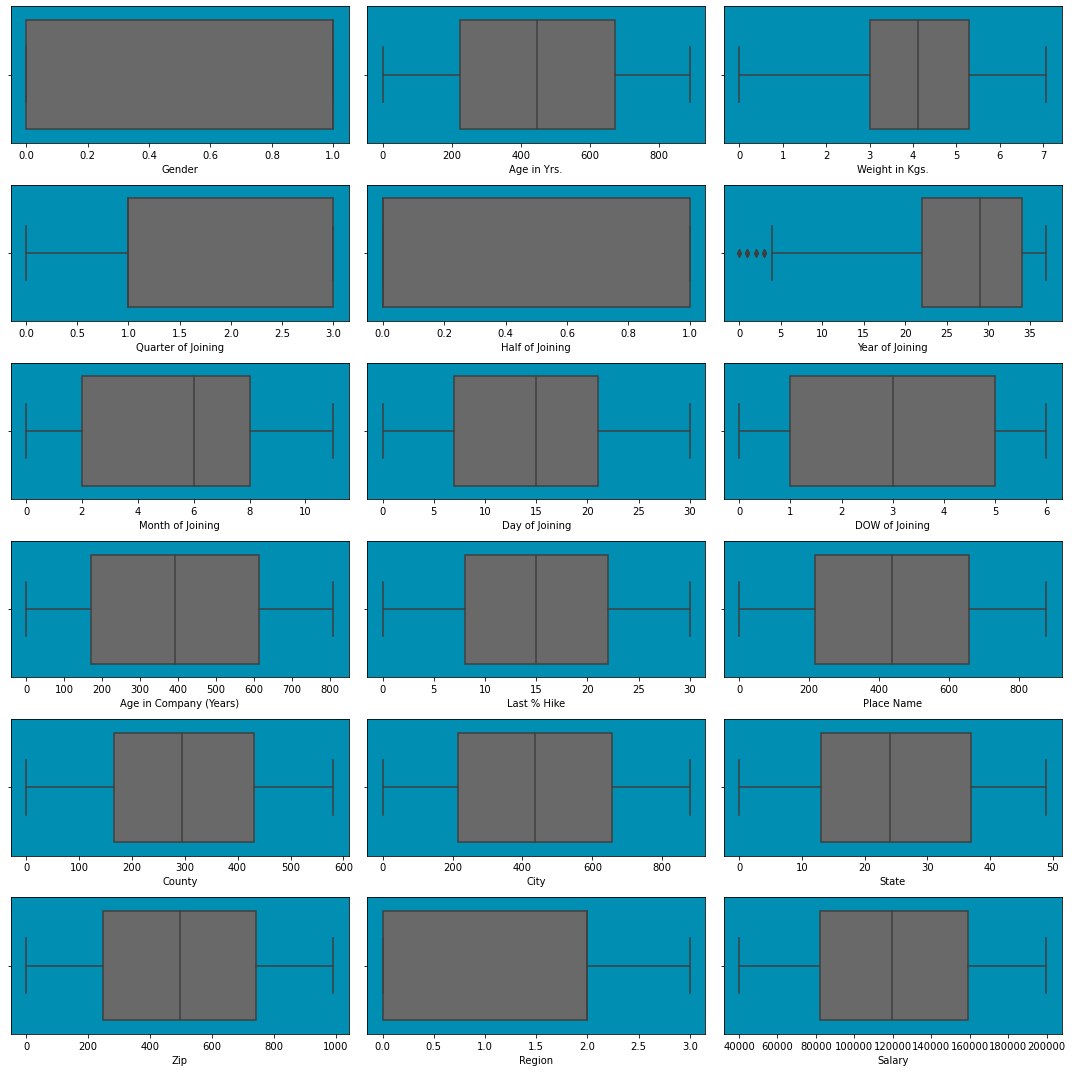

In [22]:
plt.figure(figsize=(15,15))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(6,3,i+1)
    ax=sns.boxplot(df[collist[i]], color = "#696969" , orient = "h")
    ax.set_facecolor("#008fb3")
    plt.tight_layout()

# Key observation:
    Year of Joining is only data with outliers, as said before Year of Joining logically will increase in the preiod of time since because of the growth of the job market so we are not removing outliers

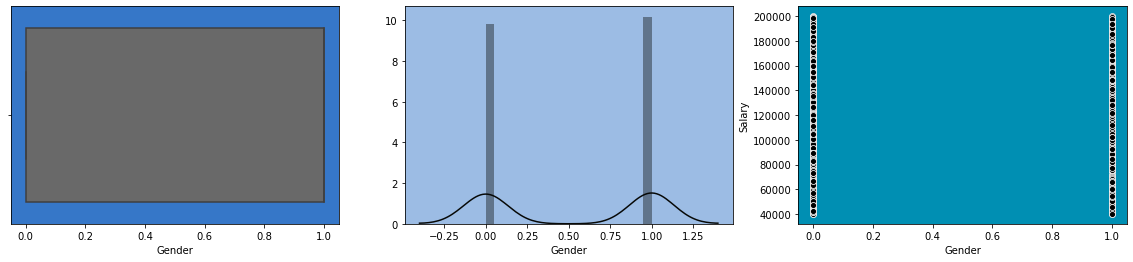

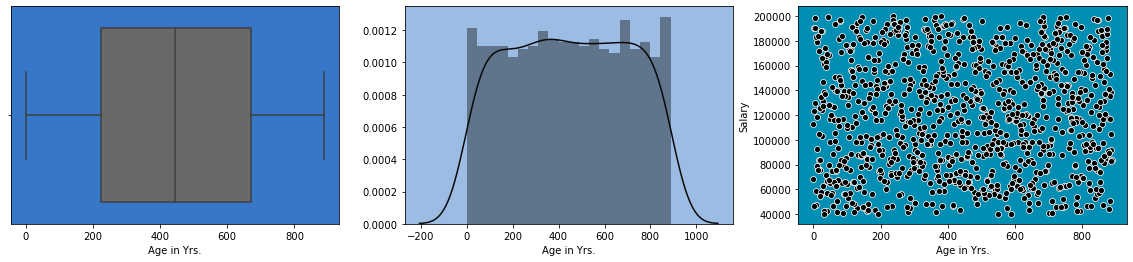

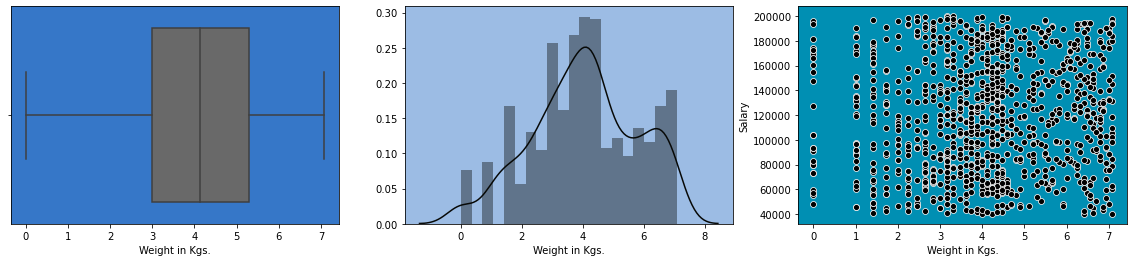

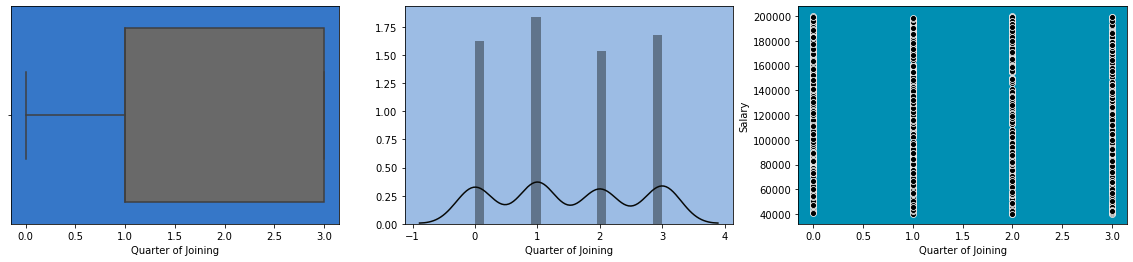

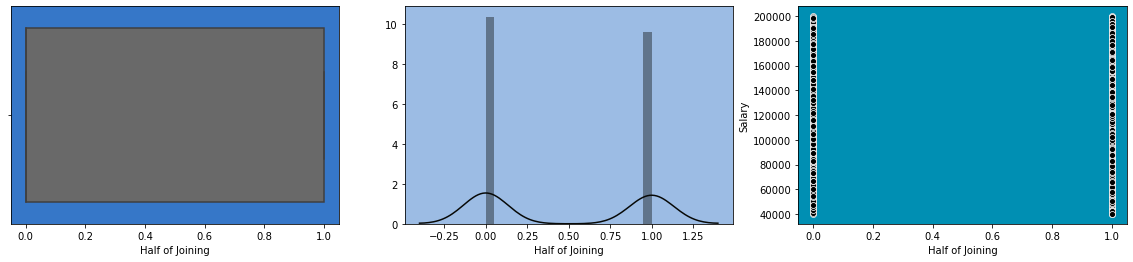

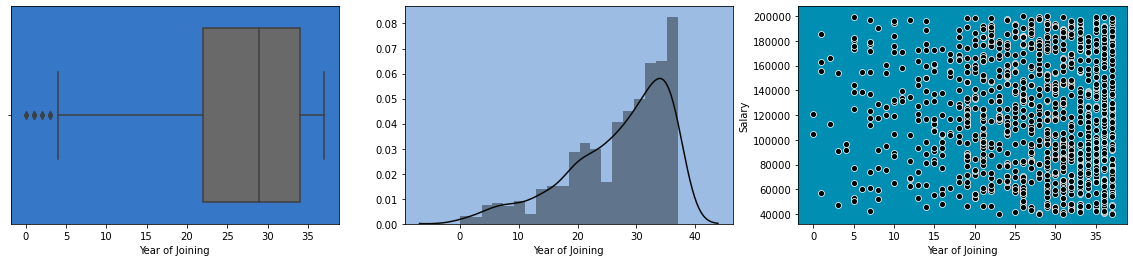

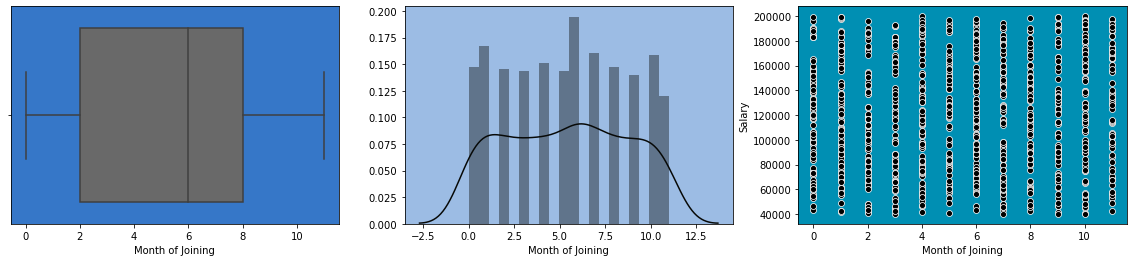

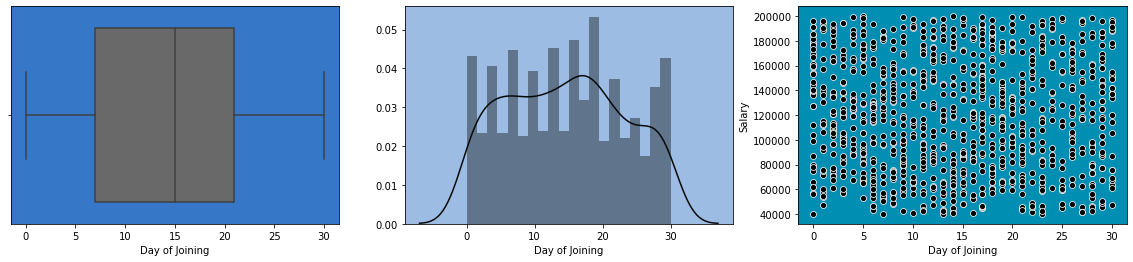

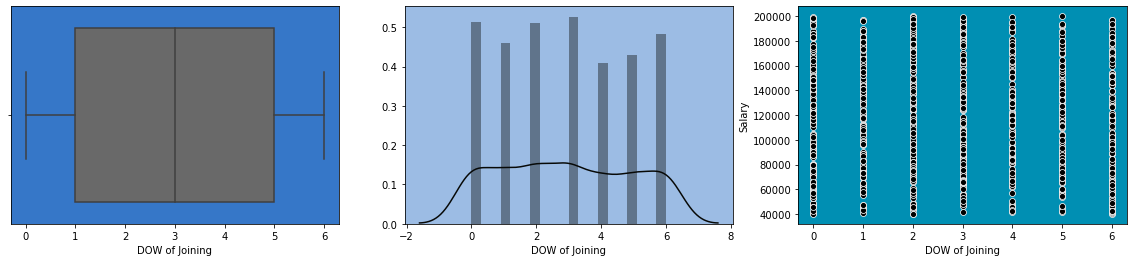

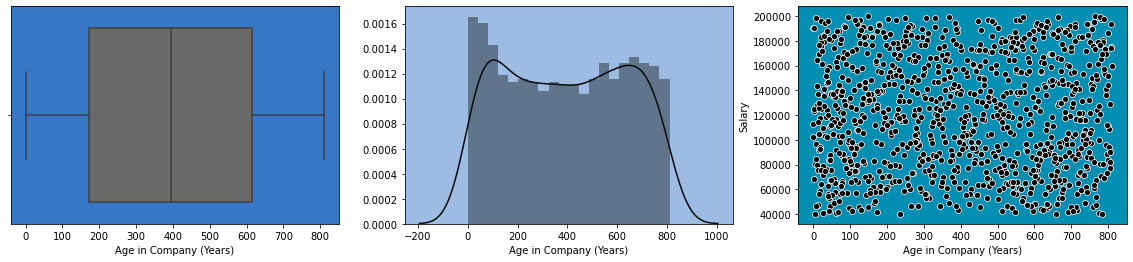

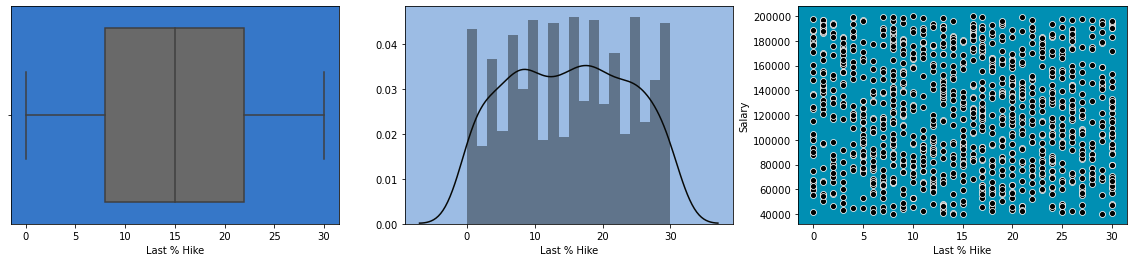

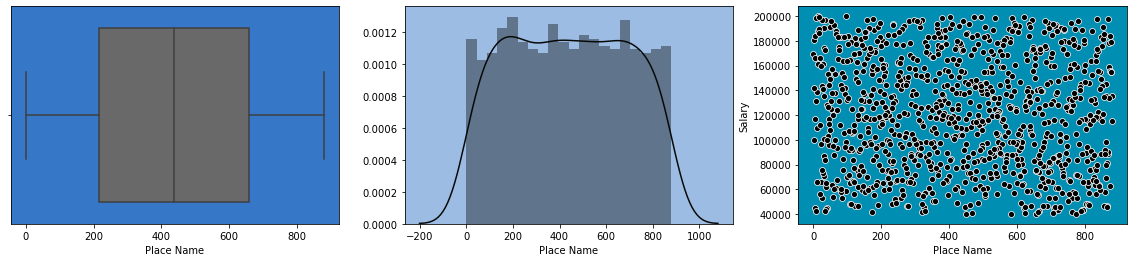

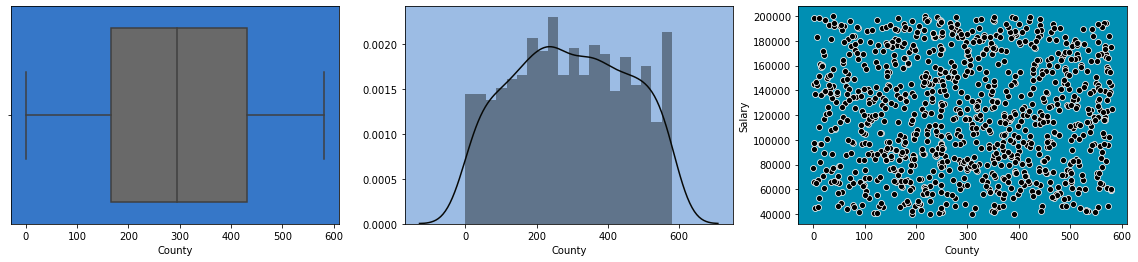

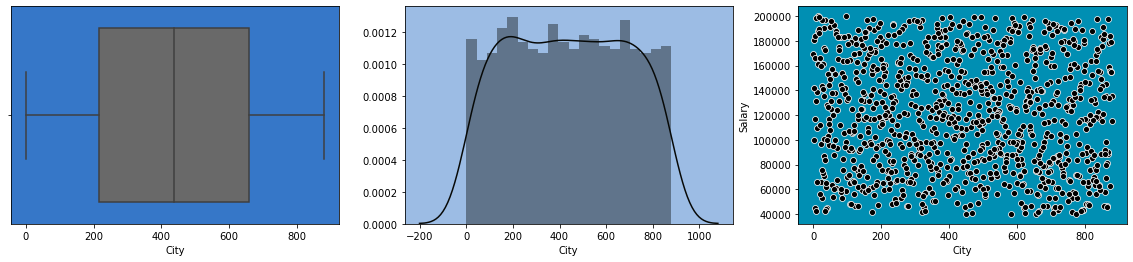

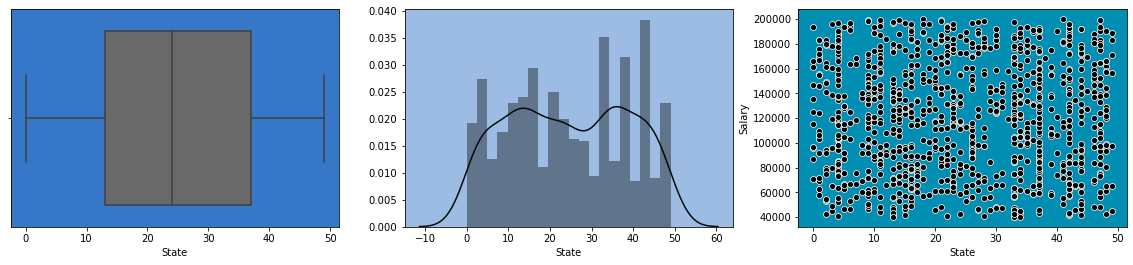

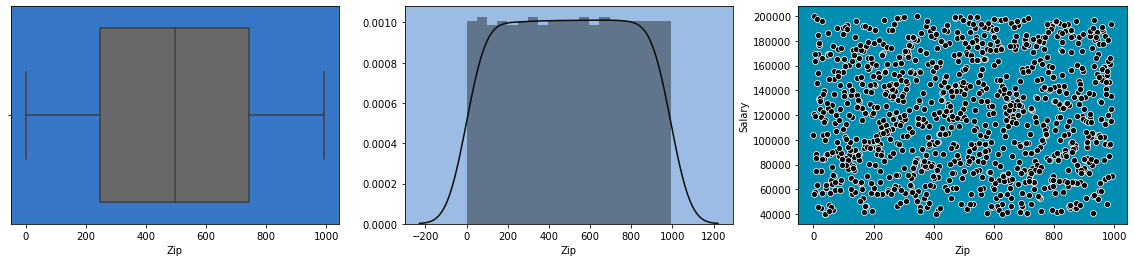

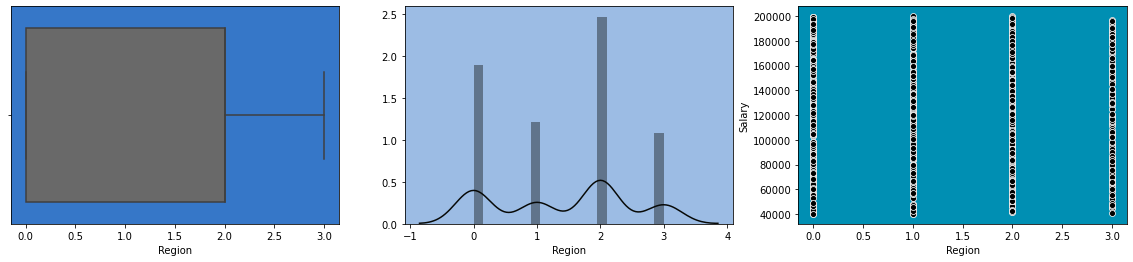

In [23]:
target_variable = "Salary"
feature_variable = ['Gender', 'Age in Yrs.',
       'Weight in Kgs.', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining','Day of Joining',
       'DOW of Joining', 'Age in Company (Years)',
       'Last % Hike','Place Name', 'County', 'City',
       'State', 'Zip', 'Region']

def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 4))
    a1=sns.boxplot(x=df[feature_name], ax=axs[0], color="#696969")
    a1.set_facecolor("#3677c8")
    a2=sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1],color="#070907")
    a2.set_facecolor("#9cbce4")
    a3=sns.scatterplot(data=df, x=feature_name, y=target_variable, ax=axs[2], color="k")
    a3.set_facecolor("#008fb3")
    plt.show()
    
for i in feature_variable:
    num_plots(i)    

<Figure size 1080x3600 with 0 Axes>

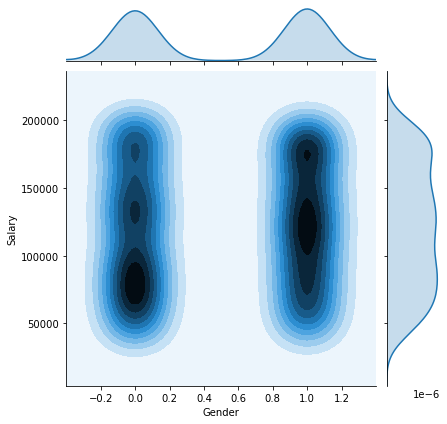

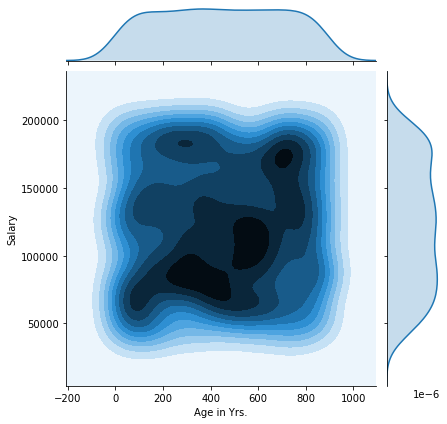

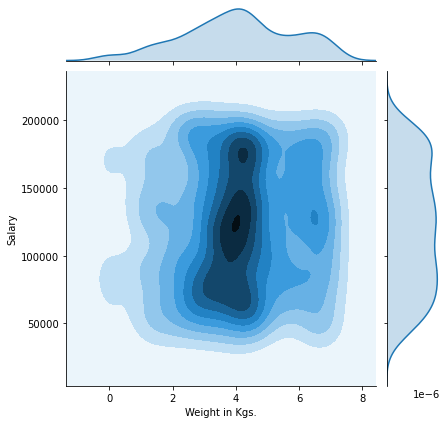

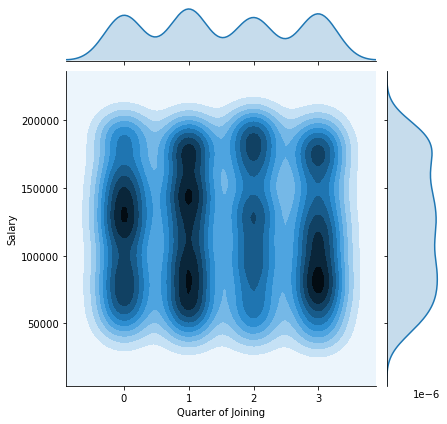

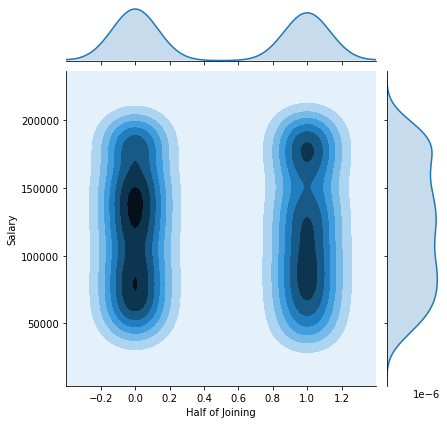

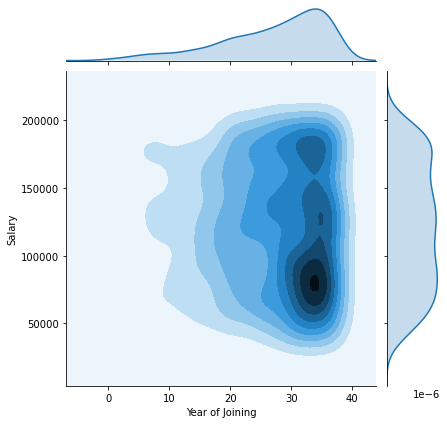

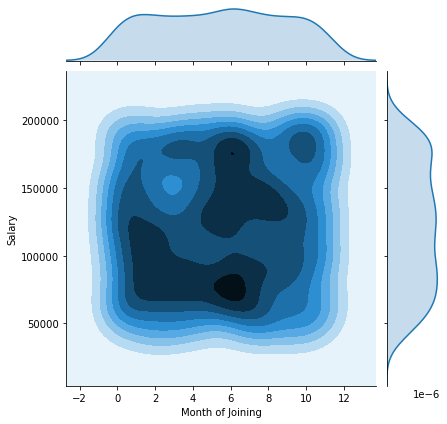

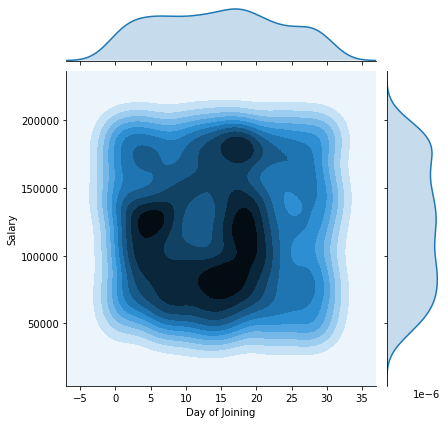

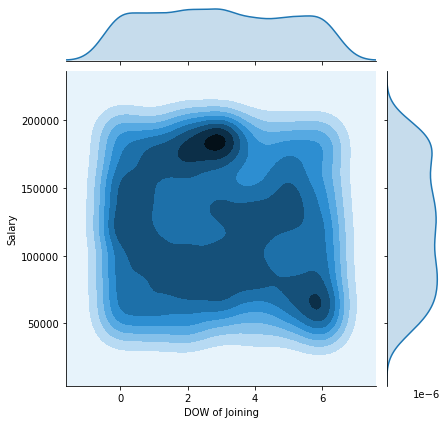

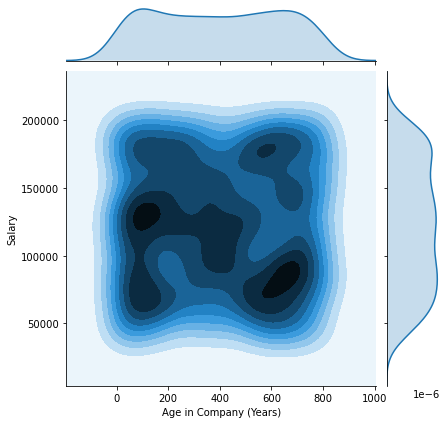

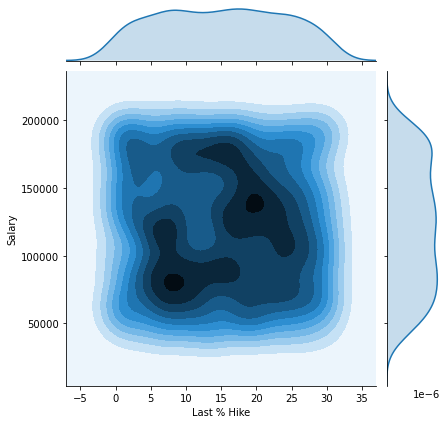

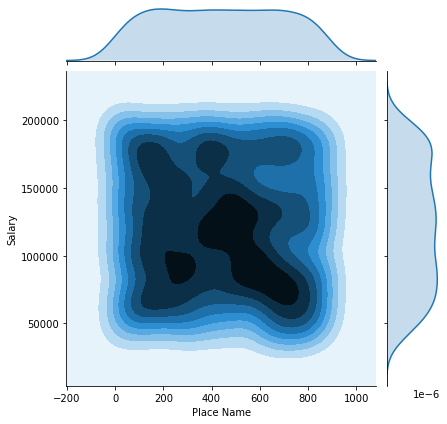

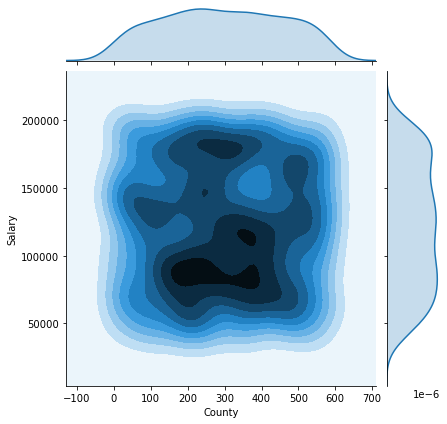

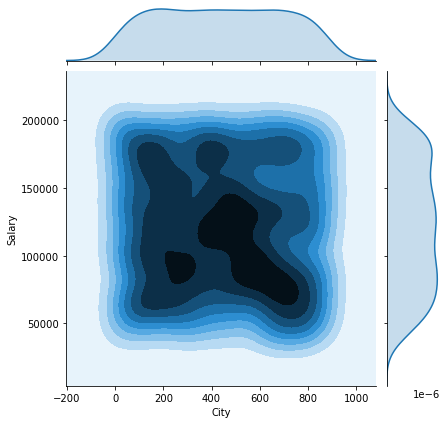

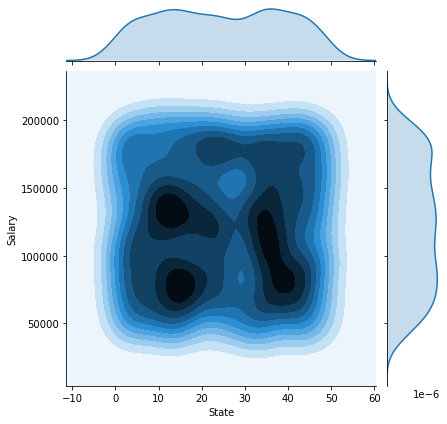

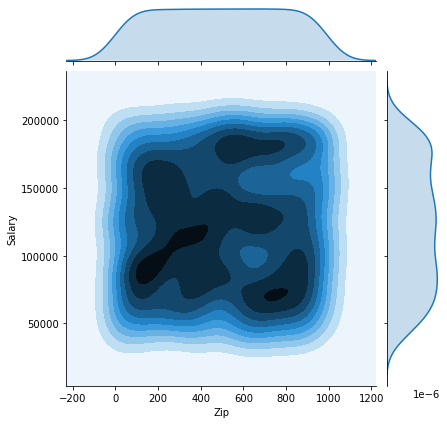

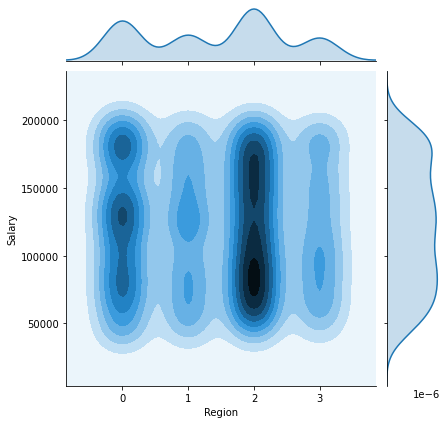

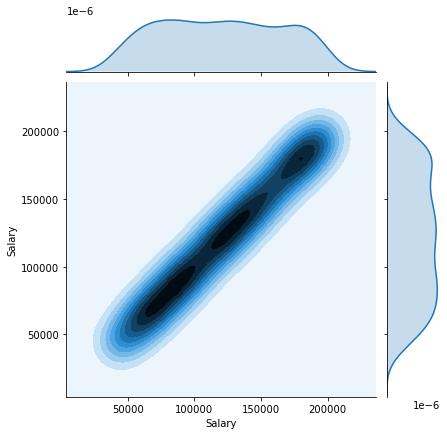

In [24]:
plt.figure(figsize=(15,50))
collist = df.columns.values
for i in range (0, len(collist)):
    sns.jointplot(x=df[collist[i]], y=df[target_variable], kind='kde')
    plt.show()

# Key observation: 
    The above three observation shows that the data is spread everywhere with the target variable "Salary". The data is a   imbalanced data which will affect the performance of our model so we will replace the salary data with the mean of the salary as in following method. 

In [25]:
df[ 'Year of Joining'].unique()


array([30, 37, 23, 36, 34, 25, 19,  3, 26, 28, 31, 35, 14, 24, 29, 18, 33,
       17, 13, 21, 16, 32,  5, 27, 20, 10, 22, 12,  8, 15,  4,  9, 11,  7,
        2,  0,  1,  6])

In [26]:
year_ofjoining_0= df.loc[df[ 'Year of Joining']==0]
year_ofjoining_1= df.loc[df[ 'Year of Joining']==1]
year_ofjoining_2= df.loc[df[ 'Year of Joining']==2]
year_ofjoining_3= df.loc[df[ 'Year of Joining']==3]
year_ofjoining_4= df.loc[df[ 'Year of Joining']==4]
year_ofjoining_5= df.loc[df[ 'Year of Joining']==5]
year_ofjoining_6= df.loc[df[ 'Year of Joining']==6]
year_ofjoining_7= df.loc[df[ 'Year of Joining']==7]
year_ofjoining_8= df.loc[df[ 'Year of Joining']==8]
year_ofjoining_9= df.loc[df[ 'Year of Joining']==9]
year_ofjoining_10= df.loc[df[ 'Year of Joining']==10]
year_ofjoining_11= df.loc[df[ 'Year of Joining']==11]
year_ofjoining_12= df.loc[df[ 'Year of Joining']==12]
year_ofjoining_13= df.loc[df[ 'Year of Joining']==13]
year_ofjoining_14= df.loc[df[ 'Year of Joining']==14]
year_ofjoining_15= df.loc[df[ 'Year of Joining']==15]
year_ofjoining_16= df.loc[df[ 'Year of Joining']==16]
year_ofjoining_17= df.loc[df[ 'Year of Joining']==17]
year_ofjoining_18= df.loc[df[ 'Year of Joining']==18]
year_ofjoining_19= df.loc[df[ 'Year of Joining']==19]
year_ofjoining_20= df.loc[df[ 'Year of Joining']==20]
year_ofjoining_21= df.loc[df[ 'Year of Joining']==21]
year_ofjoining_22= df.loc[df[ 'Year of Joining']==22]
year_ofjoining_23= df.loc[df[ 'Year of Joining']==23]
year_ofjoining_24= df.loc[df[ 'Year of Joining']==24]
year_ofjoining_25= df.loc[df[ 'Year of Joining']==25]
year_ofjoining_26= df.loc[df[ 'Year of Joining']==26]
year_ofjoining_27= df.loc[df[ 'Year of Joining']==27]
year_ofjoining_28= df.loc[df[ 'Year of Joining']==28]
year_ofjoining_29= df.loc[df[ 'Year of Joining']==29]
year_ofjoining_30= df.loc[df[ 'Year of Joining']==30]
year_ofjoining_31= df.loc[df[ 'Year of Joining']==31]
year_ofjoining_32= df.loc[df[ 'Year of Joining']==32]
year_ofjoining_33= df.loc[df[ 'Year of Joining']==33]
year_ofjoining_34= df.loc[df[ 'Year of Joining']==34]
year_ofjoining_35= df.loc[df[ 'Year of Joining']==35]
year_ofjoining_36= df.loc[df[ 'Year of Joining']==36]
year_ofjoining_37= df.loc[df[ 'Year of Joining']==37]


In [27]:
year_ofjoining_0["Salary"] = year_ofjoining_0["Salary"].mean()
year_ofjoining_1["Salary"] = year_ofjoining_1["Salary"].mean()
year_ofjoining_2["Salary"] = year_ofjoining_2["Salary"].mean()
year_ofjoining_3["Salary"] = year_ofjoining_3["Salary"].mean()
year_ofjoining_4["Salary"] = year_ofjoining_4["Salary"].mean()
year_ofjoining_5["Salary"] = year_ofjoining_5["Salary"].mean()
year_ofjoining_6["Salary"] = year_ofjoining_6["Salary"].mean()
year_ofjoining_7["Salary"] = year_ofjoining_7["Salary"].mean()
year_ofjoining_8["Salary"] = year_ofjoining_8["Salary"].mean()
year_ofjoining_9["Salary"] = year_ofjoining_9["Salary"].mean()
year_ofjoining_10["Salary"] = year_ofjoining_10["Salary"].mean()
year_ofjoining_11["Salary"] = year_ofjoining_11["Salary"].mean()
year_ofjoining_12["Salary"] = year_ofjoining_12["Salary"].mean()
year_ofjoining_13["Salary"] = year_ofjoining_13["Salary"].mean()
year_ofjoining_14["Salary"] = year_ofjoining_14["Salary"].mean()
year_ofjoining_15["Salary"] = year_ofjoining_15["Salary"].mean()
year_ofjoining_16["Salary"] = year_ofjoining_16["Salary"].mean()
year_ofjoining_17["Salary"] = year_ofjoining_17["Salary"].mean()
year_ofjoining_18["Salary"] = year_ofjoining_18["Salary"].mean()
year_ofjoining_19["Salary"] = year_ofjoining_19["Salary"].mean()
year_ofjoining_20["Salary"] = year_ofjoining_20["Salary"].mean()
year_ofjoining_21["Salary"] = year_ofjoining_21["Salary"].mean()
year_ofjoining_22["Salary"] = year_ofjoining_22["Salary"].mean()
year_ofjoining_23["Salary"] = year_ofjoining_23["Salary"].mean()
year_ofjoining_24["Salary"] = year_ofjoining_24["Salary"].mean()
year_ofjoining_25["Salary"] = year_ofjoining_25["Salary"].mean()
year_ofjoining_26["Salary"] = year_ofjoining_26["Salary"].mean()
year_ofjoining_27["Salary"] = year_ofjoining_27["Salary"].mean()
year_ofjoining_28["Salary"] = year_ofjoining_28["Salary"].mean()
year_ofjoining_29["Salary"] = year_ofjoining_29["Salary"].mean()
year_ofjoining_30["Salary"] = year_ofjoining_30["Salary"].mean()
year_ofjoining_31["Salary"] = year_ofjoining_31["Salary"].mean()
year_ofjoining_32["Salary"] = year_ofjoining_32["Salary"].mean()
year_ofjoining_33["Salary"] = year_ofjoining_33["Salary"].mean()
year_ofjoining_34["Salary"] = year_ofjoining_34["Salary"].mean()
year_ofjoining_35["Salary"] = year_ofjoining_35["Salary"].mean()
year_ofjoining_36["Salary"] = year_ofjoining_36["Salary"].mean()
year_ofjoining_37["Salary"] = year_ofjoining_37["Salary"].mean()

In [28]:
df=year_ofjoining_0.append(
    year_ofjoining_1.append(
        year_ofjoining_2.append(
            year_ofjoining_3.append(
                year_ofjoining_4.append(
                    year_ofjoining_5.append(
                        year_ofjoining_6.append(
                            year_ofjoining_7.append(
                                year_ofjoining_8.append(
                                    year_ofjoining_9.append(
                                        year_ofjoining_10.append(
                                            year_ofjoining_11.append(
                                                year_ofjoining_12.append(
                                                    year_ofjoining_13.append(
                                                        year_ofjoining_14.append(
                                                            year_ofjoining_15.append(
                                                                year_ofjoining_16.append(
                                                                    year_ofjoining_17.append(
                                                                        year_ofjoining_18.append(
                                                                            year_ofjoining_19.append(
                                                                                year_ofjoining_20.append(
                                                                                    year_ofjoining_21.append(
                                                                                        year_ofjoining_22.append(
                                                                                            year_ofjoining_23.append(
                                                                                                year_ofjoining_24.append(
                                                                                                    year_ofjoining_25.append(
                                                                                                        year_ofjoining_26.append(
                                                                                                            year_ofjoining_27.append(
                                                                                                                year_ofjoining_28.append(
                                                                                                                    year_ofjoining_29.append(
                                                                                                                        year_ofjoining_30.append(year_ofjoining_31.append(year_ofjoining_32.append(year_ofjoining_33.append(year_ofjoining_34.append(year_ofjoining_35.append(year_ofjoining_36.append(year_ofjoining_37),ignore_index = True))))))))))))))))))))))))))))))))))))
                                                                                        

                                                                       
           

In [29]:
df['DOW of Joining'].unique()

array([0, 4, 3, 2, 5, 1, 6])

In [30]:
DOJ_0= df.loc[df[ 'DOW of Joining']==0]
DOJ_1= df.loc[df[ 'DOW of Joining']==1]
DOJ_2= df.loc[df[ 'DOW of Joining']==2]
DOJ_3= df.loc[df[ 'DOW of Joining']==3]
DOJ_4= df.loc[df[ 'DOW of Joining']==4]
DOJ_5= df.loc[df[ 'DOW of Joining']==5]
DOJ_6= df.loc[df[ 'DOW of Joining']==6]

DOJ_0["Salary"] = DOJ_0["Salary"].mean()
DOJ_1["Salary"] = DOJ_1["Salary"].mean()
DOJ_2["Salary"] = DOJ_2["Salary"].mean()
DOJ_3["Salary"] = DOJ_3["Salary"].mean()
DOJ_4["Salary"] = DOJ_4["Salary"].mean()
DOJ_5["Salary"] = DOJ_5["Salary"].mean()
DOJ_6["Salary"] = DOJ_6["Salary"].mean()

df=DOJ_0.append(
    DOJ_1.append(
        DOJ_2.append(
            DOJ_3.append(
                DOJ_4.append(
                    DOJ_5.append(
                        DOJ_6),ignore_index = True)))))

In [31]:
print("KEY OBSERVTIONS:\n\n",df.corr()["Salary"].sort_values(ascending=False).drop(["Salary"]))

KEY OBSERVTIONS:

 Region                    0.049888
Zip                       0.048278
Age in Company (Years)    0.046868
State                     0.045592
Age in Yrs.               0.032310
Last % Hike               0.028187
County                    0.027505
Half of Joining           0.005019
Quarter of Joining        0.001196
Month of Joining         -0.004620
Year of Joining          -0.012533
Weight in Kgs.           -0.024810
Gender                   -0.025840
Place Name               -0.029372
City                     -0.029372
Day of Joining           -0.040558
DOW of Joining           -0.476340
Name: Salary, dtype: float64


In [32]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df["Salary"]=LE.fit_transform(df["Salary"])

# Scaling

In [33]:
x = df.drop("Salary", axis = 1)
y = df["Salary"]
x

,Gender,Age in Yrs.,Weight in Kgs.,Quarter of Joining,Half of Joining,Year of Joining,Month of Joining,Day of Joining,DOW of Joining,Age in Company (Years),Last % Hike,Place Name,County,City,State,Zip,Region
594,0,867,1.000000,0,0,0,0,2,0,589,9,854,24,854,40,583,0
606,0,874,4.123106,3,1,1,2,27,0,585,11,66,269,66,34,408,0
449,0,767,2.236068,0,0,7,0,23,0,561,17,842,385,842,21,476,0
783,0,683,2.236068,0,0,9,4,16,0,498,15,58,367,58,15,687,0
540,0,651,2.645751,3,1,10,2,7,0,484,13,108,420,108,3,875,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1,515,5.196152,0,0,37,0,17,6,35,24,207,29,207,18,198,1
393,0,29,1.000000,0,0,37,5,0,6,28,22,577,319,577,15,690,0
394,1,711,6.633250,0,0,37,5,14,6,25,13,623,123,623,4,930,3
395,1,29,7.071068,0,0,37,0,25,6,40,7,841,97,841,42,789,2


In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(x)

In [35]:
X

array([[-1.01816496,  1.63431827, -1.77884696, ...,  1.08863176,
         0.30307569, -1.32296716],
       [-1.01816496,  1.66147028,  0.03867892, ...,  0.66673597,
        -0.30797808, -1.32296716],
       [-1.01816496,  1.24643241, -1.05950352, ..., -0.24737156,
        -0.07054005, -1.32296716],
       ...,
       [ 0.98215912,  1.02921633,  1.49948497, ..., -1.44274295,
         1.51470802,  1.49185658],
       [ 0.98215912, -1.61616521,  1.75427813, ...,  1.22926368,
         1.02237327,  0.553582  ],
       [ 0.98215912, -1.05760958,  0.98230377, ..., -1.44274295,
         1.40995595,  1.49185658]])

# Since we have converted target variable into Catagory we will use Classification algorithm

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
accu = 0
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state = i)
    mod = GaussianNB()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempacc = accuracy_score(y_test,y_pred)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")        
        

Best Accuracy 100.0 found on randomstate 0


In [38]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state = best_rstate)

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, cross_val_score 
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier , LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

# Baseline
         First, we are going to train a dummy classifier that we will use as a baseline with which to compare.

In [40]:
clf_dummy = DummyClassifier(strategy="uniform", random_state=42) # Random prediction
clf_dummy.fit(x_train, y_train)

DummyClassifier(random_state=42, strategy='uniform')

In [41]:
cross_val_score(clf_dummy, x_train, y_train, cv=5, scoring="accuracy", n_jobs=-1).mean()

0.136

In [42]:
clf_dummy = DummyClassifier(strategy="most_frequent", random_state=42) 
clf_dummy.fit(x_train, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [43]:
cross_val_score(clf_dummy, x_train, y_train, cv=5, 
                scoring="accuracy", n_jobs=-1).mean()

0.16399999999999998

In [44]:
preds = cross_val_predict(clf_dummy, x_train, y_train, cv=5, n_jobs=-1)
conf_mx = metrics.confusion_matrix(y_train, preds)
conf_mx

array([[  0,   0, 104,   0,   0,   0,   0],
       [  0,   0,  92,   0,   0,   0,   0],
       [  0,   0, 123,   0,   0,   0,   0],
       [  0,   0, 113,   0,   0,   0,   0],
       [  0,   0,  99,   0,   0,   0,   0],
       [  0,   0, 113,   0,   0,   0,   0],
       [  0,   0, 106,   0,   0,   0,   0]], dtype=int64)

In [45]:
pd.crosstab(y_train, preds, rownames = ['Real'], colnames =['Predicted'])

Predicted,2
Real,
0,104
1,92
2,123
3,113
4,99
5,113
6,106


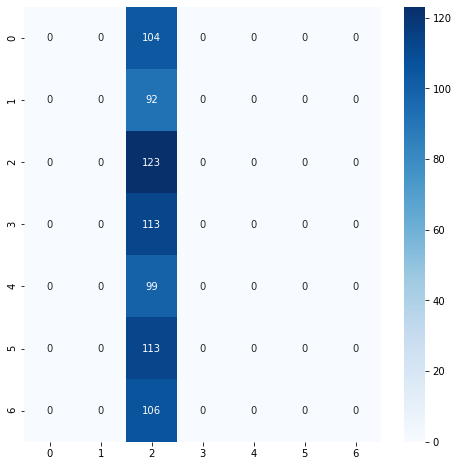

In [46]:
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(conf_mx, annot=True, fmt="d", 
                 xticklabels=clf_dummy.classes_,
                 yticklabels=clf_dummy.classes_,cmap = "Blues")

In [47]:
accuracy_base = metrics.accuracy_score(y_train, preds)
precision_base = metrics.precision_score(y_train, preds, average='weighted', 
                                         zero_division=0)
recall_base = metrics.recall_score(y_train, preds, average='weighted')
f1_base = metrics.f1_score(y_train, preds, average='weighted')
print(f"Accuracy: {accuracy_base}")
print(f"Precision: {precision_base}")
print(f"Recall: {recall_base}")
print(f"f1: {f1_base}")

Accuracy: 0.164
Precision: 0.026896
Recall: 0.164
f1: 0.046213058419243995


In [48]:
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
           1       0.00      0.00      0.00        92
           2       0.16      1.00      0.28       123
           3       0.00      0.00      0.00       113
           4       0.00      0.00      0.00        99
           5       0.00      0.00      0.00       113
           6       0.00      0.00      0.00       106

    accuracy                           0.16       750
   macro avg       0.02      0.14      0.04       750
weighted avg       0.03      0.16      0.05       750



# Sortlisting Relable model

In [49]:
def evaluate_model(estimator, x_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    
    accuracy, accuracy_std = scores['test_accuracy'].mean(), \
                                scores['test_accuracy'].std()
    
    precision, precision_std = scores['test_precision'].mean(), \
                                scores['test_precision'].std()
    
    recall, recall_std = scores['test_recall'].mean(), \
                                scores['test_recall'].std()
    
    f1, f1_std = scores['test_f1'].mean(), scores['test_f1'].std()

    
    result = {
        "Accuracy": accuracy,
        "Accuracy std": accuracy_std,
        "Precision": precision,
        "Precision std": precision_std,
        "Recall": recall,
        "Recall std": recall_std,
        "f1": f1,
        "f1 std": f1_std,
    }
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return result

In [50]:
models = [LogisticRegression(), GaussianNB(), KNeighborsClassifier(), RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42), ExtraTreeClassifier(random_state=42), 
          AdaBoostClassifier(random_state=42), GradientBoostingClassifier(random_state=42), 
          xgb.XGBClassifier()]

model_names = ["LogisticRegression", "Naive Bayes Gaussian", "K Neighbors Classifier", "Random Forest",
               "Decision Tree", "Extra Tree", "Ada Boost", 
               "Gradient Boosting", "XGBoost"]

In [51]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models)):
    print(f"\n\nStep {model+1} of {len(models)}")
    print(f".........................running {model_names[model]}")
    
    clf_scores = evaluate_model(models[model], x_train, y_train)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])



Step 1 of 9
.........................running LogisticRegression
Accuracy: 0.8986666666666666 - (std: 0.040529824409521784)
Precision: 0.9004734682195181 - (std: 0.04109972549820618)
Recall: 0.8986666666666666 - (std: 0.040529824409521784)
f1: 0.8973655386090771 - (std: 0.04141130744276097)


Step 2 of 9
.........................running Naive Bayes Gaussian
Accuracy: 1.0 - (std: 0.0)
Precision: 1.0 - (std: 0.0)
Recall: 1.0 - (std: 0.0)
f1: 1.0 - (std: 0.0)


Step 3 of 9
.........................running K Neighbors Classifier
Accuracy: 0.308 - (std: 0.029634814361190486)
Precision: 0.30114809296796696 - (std: 0.02333822940877262)
Recall: 0.308 - (std: 0.029634814361190486)
f1: 0.2996170734865783 - (std: 0.02465355916444549)


Step 4 of 9
.........................running Random Forest
Accuracy: 0.9746666666666666 - (std: 0.012927146286443543)
Precision: 0.9770849389870891 - (std: 0.011270411340375952)
Recall: 0.9746666666666666 - (std: 0.012927146286443543)
f1: 0.9745854078496716 - (std

In [52]:
df_result = pd.DataFrame({"Model": model_names,
                          "accuracy": accuracy,
                          "precision": precision,
                          "recall": recall,
                          "f1": f1})
df_result.sort_values(by="f1", ascending=False)

,Model,accuracy,precision,recall,f1
1,Naive Bayes Gaussian,1.000000,1.000000,1.000000,1.000000
4,Decision Tree,1.000000,1.000000,1.000000,1.000000
7,Gradient Boosting,1.000000,1.000000,1.000000,1.000000
8,XGBoost,1.000000,1.000000,1.000000,1.000000
3,Random Forest,0.974667,0.977085,0.974667,0.974585
0,LogisticRegression,0.898667,0.900473,0.898667,0.897366
5,Extra Tree,0.458667,0.471235,0.458667,0.460254
6,Ada Boost,0.450667,0.334092,0.450667,0.354506
2,K Neighbors Classifier,0.308000,0.301148,0.308000,0.299617


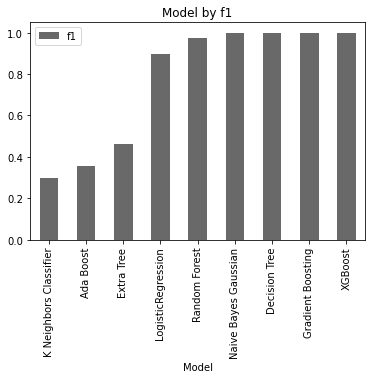

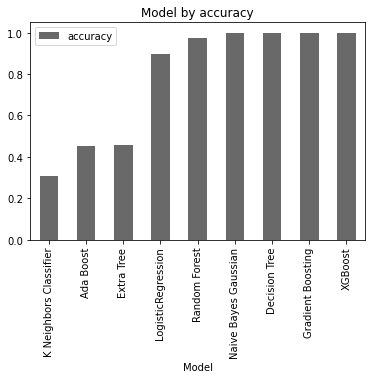

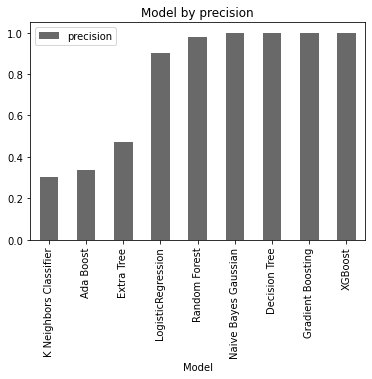

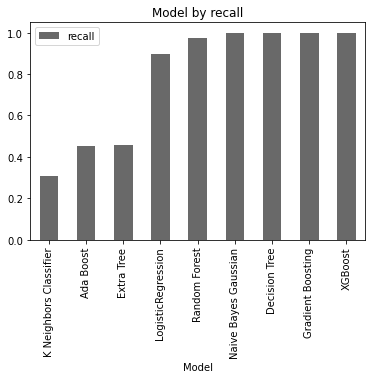

In [53]:
metrics_list = ["f1", "accuracy", "precision", "recall"]

for metric in metrics_list:
    df_result.sort_values(by=metric).plot.bar("Model", metric, color = "#696969")
    plt.title(f"Model by {metric}")
    plt.show()

# Key Observation:
    We have four model tops the chart we will take XGBost and hypertune the same.

In [54]:
clf_xgb =  xgb.XGBClassifier()
preds = cross_val_predict(clf_xgb, x_train, y_train, cv=5, n_jobs=-1)

In [55]:
clf_xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [56]:
pd.crosstab(y_train, preds, rownames = ['Real'], colnames =['Predicted'])

Predicted,0,1,2,3,4,5,6
Real,,,,,,,
0,104,0,0,0,0,0,0
1,0,92,0,0,0,0,0
2,0,0,123,0,0,0,0
3,0,0,0,113,0,0,0
4,0,0,0,0,99,0,0
5,0,0,0,0,0,113,0
6,0,0,0,0,0,0,106


In [57]:
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00       123
           3       1.00      1.00      1.00       113
           4       1.00      1.00      1.00        99
           5       1.00      1.00      1.00       113
           6       1.00      1.00      1.00       106

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



# HYPER TUNING....


In [58]:
param_grid = [
    {'learning_rate' : [1e-3, 1e-1, 'log-uniform'],
     'n_estimators': [100, 2000],
     'max_depth': [1, 10],
     'min_child_weight': [1, 6.],
     'gamma': [0, 0.5], 
     'subsample':[0.5, 1.], 
     'colsample_bytree': [0.5, 1.] 
    }
]


clf_xgb =  xgb.XGBClassifier()

In [59]:
clf_random = RandomizedSearchCV(clf_xgb, param_grid, n_iter = 200, cv = 5, 
                                scoring="f1_weighted", verbose=2, 
                                random_state=42, n_jobs = -1)

In [60]:
clf_random.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.1min finished


[21:46:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [61]:
clf_random.best_params_

{'subsample': 0.5,
 'n_estimators': 2000,
 'min_child_weight': 1,
 'max_depth': 1,
 'learning_rate': 0.001,
 'gamma': 0,
 'colsample_bytree': 0.5}

In [62]:
clf_random.best_score_

1.0

In [63]:
preds = cross_val_predict(clf_random.best_estimator_, x_train, y_train, cv=5, n_jobs=-1)
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00       123
           3       1.00      1.00      1.00       113
           4       1.00      1.00      1.00        99
           5       1.00      1.00      1.00       113
           6       1.00      1.00      1.00       106

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



# Final Hypertune with Grid Search CV

In [64]:
grid_search = GridSearchCV(clf_xgb, param_grid, cv=5,
                           scoring="f1_weighted", verbose=2, n_jobs=-1)

In [65]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 470 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 26.9min finished


[22:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

In [66]:
grid_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.001,
 'max_depth': 1,
 'min_child_weight': 1,
 'n_estimators': 2000,
 'subsample': 0.5}

In [67]:
grid_search.best_score_

1.0

In [68]:
final_model = grid_search.best_estimator_
preds = cross_val_predict(final_model, x_train, y_train, cv=5, n_jobs=-1)
preds

array([6, 1, 2, 0, 2, 4, 1, 5, 0, 2, 0, 1, 3, 2, 4, 5, 4, 5, 3, 3, 1, 5,
       2, 6, 4, 0, 0, 5, 3, 6, 0, 3, 3, 0, 4, 2, 4, 0, 6, 6, 1, 6, 4, 0,
       1, 6, 0, 0, 5, 2, 2, 2, 5, 3, 3, 6, 4, 0, 3, 4, 0, 0, 5, 2, 0, 3,
       3, 6, 2, 2, 6, 5, 0, 2, 3, 2, 2, 5, 6, 4, 0, 4, 2, 4, 2, 3, 2, 1,
       3, 4, 0, 5, 2, 2, 6, 3, 2, 2, 6, 5, 6, 5, 3, 0, 4, 4, 3, 0, 4, 3,
       3, 2, 6, 3, 3, 6, 0, 3, 3, 6, 0, 6, 6, 0, 2, 3, 4, 1, 3, 2, 5, 3,
       6, 0, 5, 0, 5, 5, 2, 1, 1, 6, 6, 5, 2, 2, 6, 3, 4, 5, 1, 2, 1, 3,
       1, 1, 2, 5, 1, 4, 0, 3, 5, 0, 3, 6, 6, 6, 6, 6, 1, 4, 3, 4, 5, 1,
       4, 6, 5, 5, 0, 2, 2, 0, 5, 6, 6, 6, 4, 1, 1, 6, 0, 3, 2, 4, 1, 6,
       3, 1, 1, 0, 5, 0, 6, 3, 0, 3, 3, 4, 0, 2, 5, 6, 0, 2, 1, 5, 3, 1,
       0, 1, 2, 3, 5, 4, 6, 3, 2, 2, 3, 1, 5, 2, 3, 5, 3, 6, 4, 5, 1, 4,
       0, 1, 6, 1, 6, 3, 1, 3, 1, 6, 4, 3, 6, 5, 3, 5, 1, 3, 2, 6, 6, 3,
       5, 0, 4, 1, 2, 4, 5, 2, 2, 1, 2, 3, 5, 4, 5, 2, 1, 1, 6, 3, 2, 1,
       5, 6, 2, 6, 0, 0, 1, 4, 3, 4, 2, 1, 3, 0, 0,

In [69]:
pd.crosstab(y_train, preds, rownames = ['Actual'], colnames =['Predicted'])

Predicted,0,1,2,3,4,5,6
Actual,,,,,,,
0,104,0,0,0,0,0,0
1,0,92,0,0,0,0,0
2,0,0,123,0,0,0,0
3,0,0,0,113,0,0,0
4,0,0,0,0,99,0,0
5,0,0,0,0,0,113,0
6,0,0,0,0,0,0,106


In [70]:
print(metrics.classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00       123
           3       1.00      1.00      1.00       113
           4       1.00      1.00      1.00        99
           5       1.00      1.00      1.00       113
           6       1.00      1.00      1.00       106

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [71]:
y_pred = final_model.predict(x_test)

pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'])

Predicted,0,1,2,3,4,5,6
Actual,,,,,,,
0,41,0,0,0,0,0,0
1,0,31,0,0,0,0,0
2,0,0,31,0,0,0,0
3,0,0,0,40,0,0,0
4,0,0,0,0,30,0,0
5,0,0,0,0,0,45,0
6,0,0,0,0,0,0,32


In [72]:
print(metrics.classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        45
           6       1.00      1.00      1.00        32

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [73]:
conf_mx = metrics.confusion_matrix(y_test, y_pred)

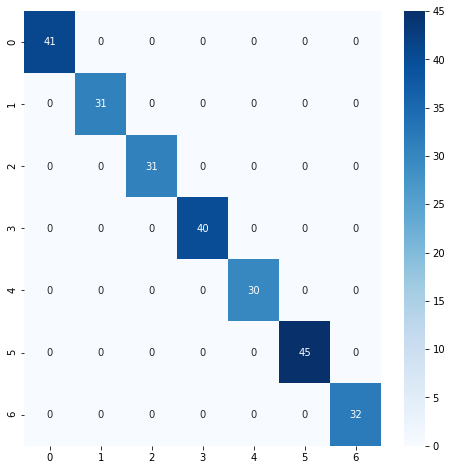

In [74]:
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(conf_mx, annot=True, fmt="d", 
                 xticklabels=final_model.classes_,
                 yticklabels=final_model.classes_,
                cmap= "Blues")

# Feature importances¶


In [75]:
feature_importances = final_model.feature_importances_
feature_importances

array([0.02394096, 0.0286604 , 0.02801789, 0.02914561, 0.02960735,
       0.02912866, 0.0277883 , 0.02715927, 0.5365291 , 0.02993939,
       0.02939904, 0.03149064, 0.0280785 , 0.03062449, 0.03044347,
       0.03448288, 0.02556405], dtype=float32)

In [76]:
selector = RFECV(final_model, step=1, cv=StratifiedKFold())
selector = selector.fit(x_train, y_train)

[22:22:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:23:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[22:25:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[22:28:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:28:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:28:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[21:31:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

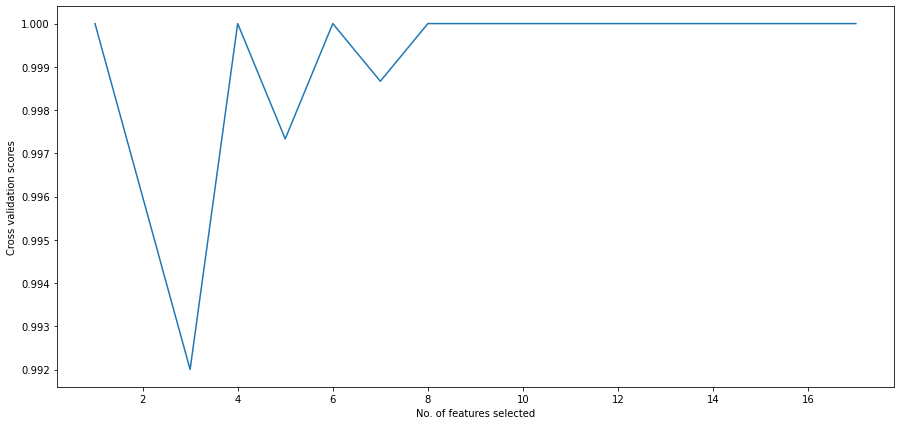

In [77]:
plt.figure(figsize=(15,7))
plt.xlabel("No. of features selected")
plt.ylabel("Cross validation scores")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [78]:
selector.grid_scores_

array([1.        , 0.996     , 0.992     , 1.        , 0.99733333,
       1.        , 0.99866667, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

# Saving the final model

In [79]:
import joblib
joblib.dump(final_model,"Employee_Salary_prediction.obj")

['Employee_Salary_prediction.obj']

In [80]:
EMPSCORE= joblib.load('Employee_Salary_prediction.obj')
prediction= EMPSCORE.predict(x_test)
prediction

array([0, 0, 3, 5, 1, 0, 2, 6, 3, 1, 5, 5, 4, 6, 5, 2, 0, 6, 2, 2, 2, 5,
       3, 3, 0, 4, 2, 2, 4, 2, 4, 1, 1, 4, 3, 4, 0, 3, 0, 6, 6, 0, 1, 1,
       6, 4, 4, 2, 3, 5, 3, 3, 6, 3, 0, 5, 6, 6, 0, 3, 5, 1, 2, 6, 3, 6,
       6, 5, 6, 5, 4, 3, 4, 6, 0, 3, 3, 4, 5, 1, 6, 5, 3, 0, 0, 1, 6, 5,
       5, 0, 5, 5, 0, 6, 1, 5, 5, 2, 3, 1, 4, 0, 2, 0, 3, 1, 1, 4, 0, 6,
       2, 5, 5, 5, 6, 3, 5, 3, 5, 5, 4, 0, 2, 0, 2, 4, 3, 6, 0, 1, 5, 1,
       5, 1, 4, 1, 3, 2, 5, 0, 2, 1, 5, 6, 6, 3, 3, 3, 2, 2, 6, 2, 3, 4,
       0, 0, 5, 3, 0, 5, 5, 0, 1, 0, 0, 3, 3, 0, 3, 3, 0, 4, 2, 4, 5, 4,
       6, 1, 0, 2, 4, 0, 5, 3, 0, 0, 1, 5, 4, 6, 4, 4, 3, 2, 4, 1, 1, 6,
       1, 2, 1, 5, 3, 0, 4, 1, 4, 5, 5, 0, 2, 1, 2, 0, 0, 0, 6, 6, 2, 5,
       4, 5, 0, 6, 3, 3, 1, 5, 2, 3, 5, 3, 1, 4, 2, 2, 1, 6, 4, 6, 5, 5,
       6, 3, 0, 5, 3, 2, 5, 1], dtype=int64)

In [81]:
print("Model Score test data :" ,EMPSCORE.score(x_test,y_test))

Model Score test data : 1.0


In [82]:
print("Accuracy score is :",accuracy_score(y_test,prediction))

Accuracy score is : 1.0
